In [1]:
import time

import itk
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('dark_background')

<class 'itk.itkHalideDiscreteGaussianImageFilterPython.itkHalideDiscreteGaussianImageFilterIF3IF3'>
dim = np.int32(10); variance = np.float64(4.0); ms_per_sample = 0.109
dim = np.int32(314); variance = np.float64(4.0); ms_per_sample = 153.965
dim = np.int32(396); variance = np.float64(4.0); ms_per_sample = 301.526
dim = np.int32(454); variance = np.float64(4.0); ms_per_sample = 459.207
dim = np.int32(500); variance = np.float64(4.0); ms_per_sample = 622.174
dim = np.int32(10); variance = np.float64(8.345679012345679); ms_per_sample = 3.295
dim = np.int32(314); variance = np.float64(8.345679012345679); ms_per_sample = 160.980
dim = np.int32(396); variance = np.float64(8.345679012345679); ms_per_sample = 313.206
dim = np.int32(454); variance = np.float64(8.345679012345679); ms_per_sample = 470.138
dim = np.int32(500); variance = np.float64(8.345679012345679); ms_per_sample = 621.490
dim = np.int32(10); variance = np.float64(14.271604938271604); ms_per_sample = 3.267
dim = np.int32(314); 

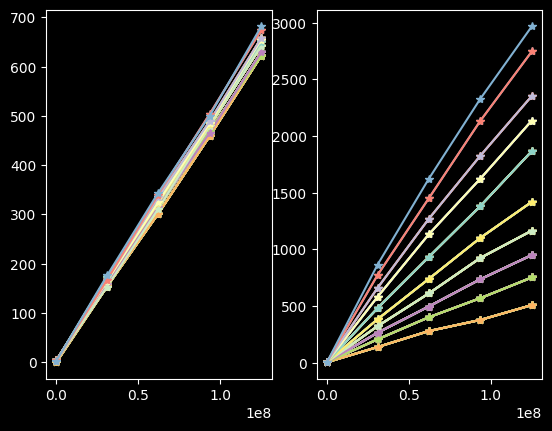

In [18]:
SAMPLES = 5

IT = itk.Image[itk.F, 3]
FTS = [
    itk.HalideDiscreteGaussianImageFilter[IT, IT],
    # itk.HalideDiscreteGaussianImageFilter[IT, IT],
    itk.DiscreteGaussianImageFilter[IT, IT],
]

PIXEL_COUNTS = np.linspace(10**3, 500**3, num=5)
VARIANCES = np.linspace(2, 10, num=10) **2

DIMS = np.cbrt(PIXEL_COUNTS).astype('i')

fig, axs = plt.subplots(nrows=1, ncols=len(FTS))

for FT, ax in zip(FTS, axs):
    print(FT)
    times = []
    for variance in VARIANCES:
        vals = []
        for dim in DIMS:
            data = np.random.normal(size=(dim,dim,dim)).astype('f')
            im = itk.GetImageViewFromArray(data)
    
            start = time.perf_counter()
            for _ in range(SAMPLES):
                filt = FT.New()
                filt.SetInput(im)
                filt.SetVariance(variance)
                filt.Update()
            end = time.perf_counter()
            ms_per_sample = 1000 * (end - start) / SAMPLES
            vals.append(ms_per_sample)
            print(f'{dim = }; {variance = }; {ms_per_sample = :.3f}')
        times.append(vals)

        for v, seq in zip(VARIANCES, times):
            ax.plot(np.pow(DIMS, 3), seq, label=f'{v}', marker='*')